1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd
import seaborn as sns
user_url = 'https://stepik.org/media/attachments/lesson/360348/user_data.csv'
logs_url = 'https://stepik.org/media/attachments/lesson/360348/logs.csv'
user_data = pd.read_csv(user_url)
logs = pd.read_csv(logs_url)
data = user_data.merge(logs)
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [4]:
data['platform'].nunique()

3

2. Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

In [33]:
logs_success = data.query('success == True')\
                .groupby('client', as_index = False)\
                .agg({'platform': 'count'})\
                .sort_values('platform')
max_success = logs_success.platform.max()
logs_success.query('platform == @max_success')\
            .sort_values('client')\
            .client.to_list()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

3. С какой платформы осуществляется наибольшее количество успешных операций?

In [35]:
data.query('success == True').platform.value_counts().idxmax()

'phone'

4. Какая платформа наиболее популярна среди премиумных клиентов?

In [37]:
data.query('premium == True').platform.value_counts().idxmax()

'phone'

5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

Используйте датасэт, который вы получили на предыдущем шаге

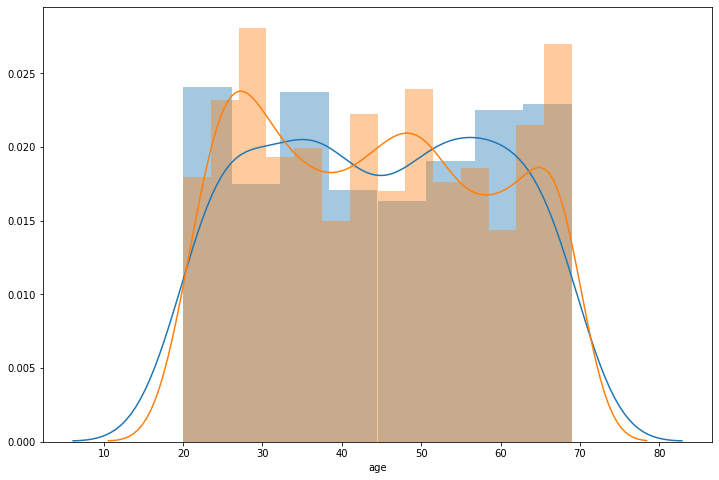

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.distplot(data.query('premium == True').age)
sns.distplot(data.query('premium == False').age)

#sns.countplot(data.query('platform == "computer"').query('success == True').age)


6. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки

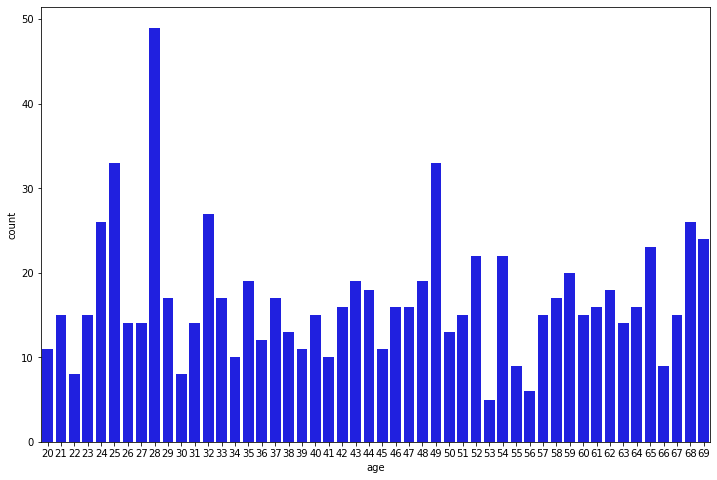

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(data.query('platform == "computer"').query('success == True').age, color = 'blue')